In [33]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [34]:
import numpy as np

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline

# For string manipulation
import string

# For creating vectors from text and determining similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# To display DataFrame
from IPython.display import display



In [35]:
!pip install gdown
!gdown --id 11lg5kzdTidiiYjqlfLXQn0r8yi5ae77O
!gdown --id 1DXMxVci-rdvXGgtf8fRXr6wWS-FFxUA4
!gdown --id 1M9oq8IN-Icr5S1-aPenEqcJux41ubERa

tracks = pd.read_csv('./tracks_transformed.csv', na_filter=False)
tracks.head()


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11lg5kzdTidiiYjqlfLXQn0r8yi5ae77O
To: /Users/suneherahasib/tracks_transformed.csv
 48%|██████████████████▋                    | 64.0M/134M [00:29<00:23, 2.99MB/s]("Connection broken: ConnectionResetError(54, 'Connection reset by peer')", ConnectionResetError(54, 'Connection reset by peer'))
 48%|██████████████████▊                    | 64.5M/134M [00:30<00:32, 2.15MB/s]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5

,id,name,artists,id_artists,genres,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,35iwgR4jXetI318WEWsa1Q,Carve,Uli,['45tIt06XoI0Iio4LBEVpls'],,1922,126.903,6,0.645,0.4450,0,46.662,1,0.4510,0.674,0.7440,0.151,0.127,104.851
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],,1922,98.200,0,0.695,0.2630,0,37.864,1,0.9570,0.797,0.0000,0.148,0.655,102.009
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],tango vintage tango,1922,181.640,0,0.434,0.1770,1,38.820,1,0.0512,0.994,0.0218,0.212,0.457,130.418
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],tango vintage tango,1922,176.907,0,0.321,0.0946,7,32.039,1,0.0504,0.995,0.9180,0.104,0.397,169.980
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],adult standards big band easy listening lounge...,1922,163.080,0,0.402,0.1580,3,43.100,0,0.0390,0.989,0.1300,0.311,0.196,103.220


In [36]:
artists = pd.read_csv('./artists_transformed.csv')

# Drop rows with null values
artists.dropna(inplace=True)

# Convert "followers" field to numeric
artists['followers'] = pd.to_numeric(artists['followers'])

# Display first 5 records
artists.head()

,id,followers,genres,name,popularity
45,0VLMVnVbJyJ4oyZs2L3Yl2,71.0,carnaval cadiz,Las Viudas De Los Bisabuelos,6
46,0dt23bs4w8zx154C5xdVyl,63.0,carnaval cadiz,Los De Capuchinos,5
47,0pGhoB99qpEJEsBQxgaskQ,64.0,carnaval cadiz,Los “Pofesionales”,7
48,3HDrX2OtSuXLW5dLR85uN3,53.0,carnaval cadiz,Los Que No Paran De Rajar,6
136,22mLrN5fkppmuUPsHx6i2G,59.0,classical harp harp,Vera Dulova,3


In [37]:
genres = pd.read_csv('./data_by_genres_o.csv', na_filter=False)
genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [38]:
tracks.describe()

,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,1988.566168,230.051167,27.570053,0.563594,0.542036,5.221603,49.793933,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857
std,22.831283,126.526087,18.370642,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108
min,1900.000000,3.344000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1974.000000,175.093000,13.000000,0.453000,0.343000,2.000000,47.109000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000
50%,1992.000000,214.893000,27.000000,0.577000,0.549000,5.000000,50.757000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000
75%,2007.000000,263.867000,41.000000,0.686000,0.748000,8.000000,53.518000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000
max,2021.000000,5621.218000,100.000000,0.991000,1.000000,11.000000,65.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000


In [39]:
artists.describe()

,followers,popularity
count,2.986100e+05,298610.000000
mean,3.850667e+04,19.535937
std,5.007154e+05,17.527959
min,0.000000e+00,0.000000
25%,1.570000e+02,4.000000
50%,8.940000e+02,16.000000
75%,5.221750e+03,32.000000
max,7.890023e+07,100.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

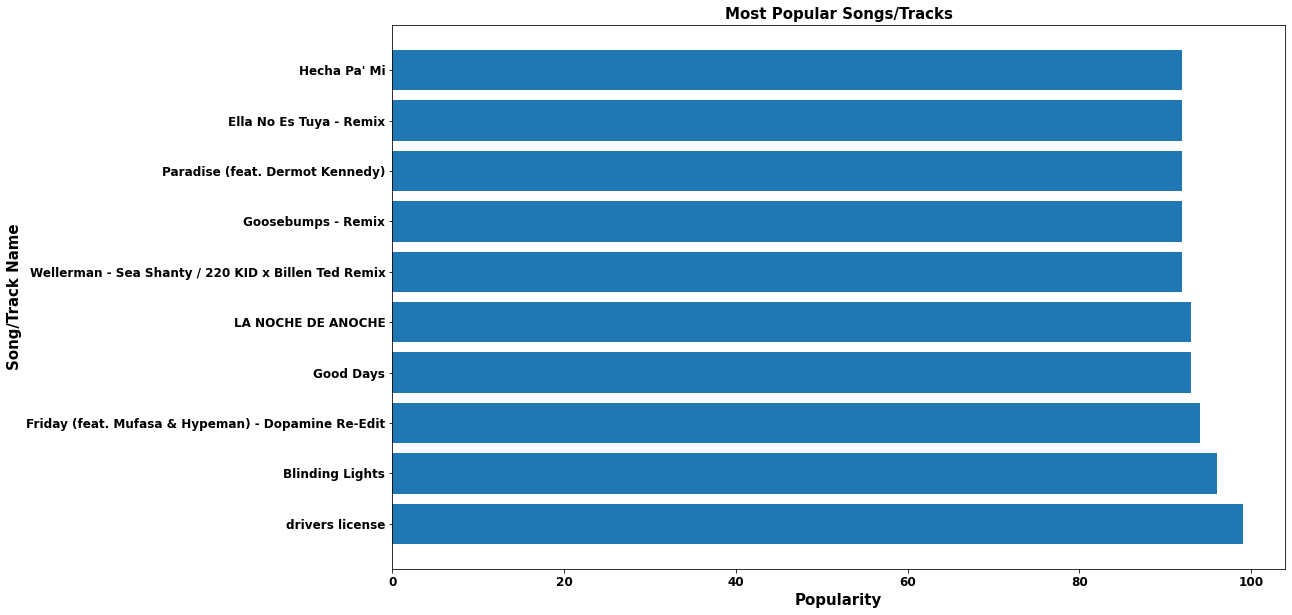

In [40]:
popular_songs = tracks.groupby('name')['popularity'].mean().sort_values(ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(16, 10))
plt.barh(popular_songs.index, popular_songs)
plt.title('Most Popular Songs/Tracks', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Popularity', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Song/Track Name', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')

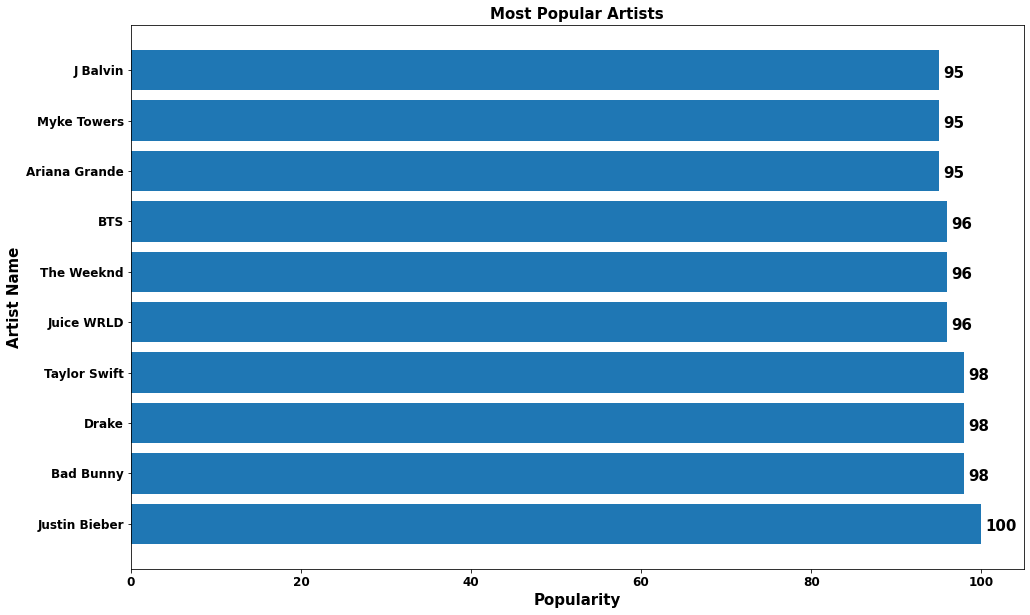

In [41]:
popular_artists = artists.groupby('name')['popularity'].mean().sort_values(ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(16, 10))
plt.barh(popular_artists.index, popular_artists)
plt.title('Most Popular Artists', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Popularity', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Artist Name', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_artists):
    plt.text(v+0.5, i-0.15, str(int(v)), fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

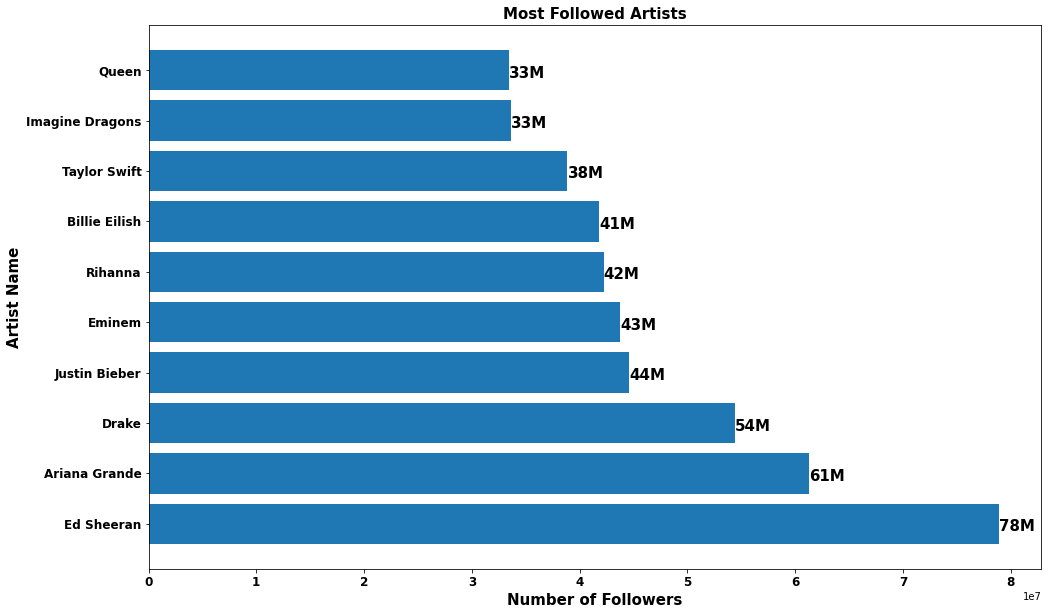

In [42]:
# Get top 10 most followed artists
popular_artists = artists.groupby('name')['followers'].mean().sort_values(ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(16, 10))
plt.barh(popular_artists.index, popular_artists)
plt.title('Most Followed Artists', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Number of Followers', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Artist Name', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_artists):
    plt.text(v+0.5, i-0.15, str(int(v//1000000))+'M', fontdict=dict(fontsize=15), fontweight='bold')
plt.show()


In [43]:
song_library = tracks.sort_values(by=['popularity'], ascending=False).head(10000)

# Drop "id_artists" field from DataFrame
song_library.drop(['id_artists'], axis=1, inplace=True)

# Reset index for DataFrame
song_library.reset_index(inplace=True, drop=True)

# Display first 5 records
song_library.head()

,id,name,artists,genres,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon",pop rb canadian contemporary rb pop rb canadia...,2021,198.082,100,0.677,0.696,0,53.819,1,0.1190,0.3210,0.000000,0.420,0.464,90.030
1,7lPN2DXiMsVn7XUKtOW1CS,drivers license,Olivia Rodrigo,pop postteen pop,2021,242.014,99,0.585,0.436,10,51.239,1,0.0601,0.7210,0.000013,0.105,0.132,143.874
2,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,Masked Wolf,australian hip hop,2021,132.780,98,0.778,0.695,4,53.135,0,0.0913,0.1750,0.000000,0.150,0.472,149.996
3,5QO79kh1waicV47BqGRL3g,Save Your Tears,The Weeknd,canadian contemporary rb canadian pop pop,2020,215.627,97,0.680,0.826,0,54.513,1,0.0309,0.0212,0.000012,0.543,0.644,118.051
4,6tDDoYIxWvMLTdKpjFkc1B,telepatía,Kali Uchis,colombian pop pop,2020,160.191,97,0.653,0.524,11,50.984,0,0.0502,0.1120,0.000000,0.203,0.553,83.970


In [17]:
song_vectorizer = CountVectorizer()

# Fit the vectorizer on "genres" field of song_library DataFrame
song_vectorizer.fit(song_library['genres'])


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [18]:
def song_recommender(song_name):
    try:
        # Numeric columns (audio features) in song_library DataFrame
        num_cols = ['release_year', 'duration_s', 'popularity', 'danceability', 'energy', 'key', 'loudness',
                    'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

        # Create vector from "genres" field (text data) for given song
        text_vec1 = song_vectorizer.transform(song_library[song_library['name']==str(song_name)]['genres']).toarray()

        # Create vector from numerical columns for given song
        num_vec1 = song_library[song_library['name']==str(song_name)][num_cols].to_numpy()

        # Initialise empty list to store similarity scores
        sim_scores=  []

        # For every song/track in song library, determine cosine similarity with given song
        for index, row in song_library.iterrows():
            name = row['name']

            # Create vector from "genres" field for other songs
            text_vec2 = song_vectorizer.transform(song_library[song_library['name']==name]['genres']).toarray()

            # Create vector from numerical columns for other songs
            num_vec2 = song_library[song_library['name']==name][num_cols].to_numpy()

            # Calculate cosine similarity using text vectors
            text_sim = cosine_similarity(text_vec1, text_vec2)[0][0]

            # Calculate cosine similarity using numerical vectors
            num_sim = cosine_similarity(num_vec1, num_vec2)[0][0]

            # Take average of both similarity scores and add to list of similarity scores
            sim = (text_sim + num_sim)/2
            sim_scores.append(sim)
        
        # Add new column containing similarity scores to song_library DataFrame
        song_library['similarity'] = sim_scores

        # Sort DataFrame based on "similarity" column
        song_library.sort_values(by=['similarity', 'popularity', 'release_year'], ascending=[False, False, False], inplace=True)

        # Create DataFrame "recommended_songs" containing 5 songs that are most similar to the given song and return this DataFrame
        recommended_songs = song_library[['name', 'artists', 'release_year']][2:7]
        return recommended_songs
    except:
        # If given song is not found in song library then display message
        print('{} not found in songs library.'.format(song_name))

In [19]:
# More songs like Hail to the King by Avenged Sevenfold
song_recommender('Hail to the King')

,name,artists,release_year
2939,All Summer Long,Kid Rock,2007
8540,Shepherd of Fire,Avenged Sevenfold,2013
7399,Afterlife,Avenged Sevenfold,2007
9141,A Little Piece of Heaven,Avenged Sevenfold,2007
1763,Down with the Sickness,Disturbed,2000


In [20]:
# Sort artists data based on popularity and take first 10,000 records
artist_library = artists.sort_values(by=['popularity', 'followers'], ascending=[False, False]).head(10000)

# Reset index for DataFrame
artist_library.reset_index(inplace=True, drop=True)

# Display first 5 records
artist_library.head()


,id,followers,genres,name,popularity
0,1uNFoZAHBGtllmzznpCI3s,44606973.0,canadian pop pop postteen pop,Justin Bieber,100
1,3TVXtAsR1Inumwj472S9r4,54416812.0,canadian hip hop canadian pop hip hop pop rap ...,Drake,98
2,06HL4z0CvFAxyc27GXpf02,38869193.0,pop postteen pop,Taylor Swift,98
3,4q3ewBCX7sLwd24euuV69X,32244734.0,latin reggaeton trap latino,Bad Bunny,98
4,3Nrfpe0tUJi4K4DXYWgMUX,31623813.0,kpop kpop boy group,BTS,96


In [21]:
# Create CountVectorizer object to transform text into vector
artist_vectorizer = CountVectorizer()

# Fit the vectorizer on "genres" field of song_library DataFrame
artist_vectorizer.fit(artist_library['genres'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [44]:
# Function to recommend more artists based on given artist name
def artist_recommender(artist_name):
    try:
        # Numeric columns (audio features) in artist_library DataFrame
        num_cols = ['followers', 'popularity']

        # Create vector from "genres" field (text data) for given artist
        text_vec1 = artist_vectorizer.transform(artist_library[artist_library['name']==str(artist_name)]['genres']).toarray()

        # Create vector from numerical columns for given song
        num_vec1 = artist_library[artist_library['name']==str(artist_name)][num_cols].to_numpy()

        # Initialise empty list to store similarity scores
        sim_scores = []

        # For every artist in artist library, determine cosine similarity with given artist
        for index, row in artist_library.iterrows():
            name = row['name']

            # Create vector from "genres" field for other artists
            text_vec2 = artist_vectorizer.transform(artist_library[artist_library['name']==name]['genres']).toarray()

            # Create vector from numerical columns for other songs
            num_vec2 = artist_library[artist_library['name']==name][num_cols].to_numpy()

            # Calculate cosine similarity using text vectors
            text_sim = cosine_similarity(text_vec1, text_vec2)[0][0]

            # Calculate cosine similarity using numerical vectors
            num_sim = cosine_similarity(num_vec1, num_vec2)[0][0]

            # Take average of both similarity scores and add to list of similarity scores
            sim = (text_sim + num_sim)/2
            sim_scores.append(sim)

        # Add new column containing similarity scores to artist_library DataFrame
        artist_library['similarity'] = sim_scores

        # Sort DataFrame based on "similarity" column
        artist_library.sort_values(by=['similarity', 'popularity', 'followers'], ascending=[False, False, False], inplace=True)

        # Create DataFrame "recommended_artists" containing 5 artists that are most similar to the given artist, sort and return this DataFrame
        recommended_artists = artist_library[['name', 'genres', 'followers', 'popularity']][2:7]
        recommended_artists.sort_values(by=['popularity', 'followers'], ascending=[False, False], inplace=True)
        return recommended_artists
    except:
        # If given artist is not found in artist library then display message
        print('{} not found in artists library.'.format(artist_name))


In [54]:
# Function to recommend similar songs and artists based on song name
def spotify_recommender(song_name):
    try:
        # Get DataFrame of recommended songs using song_recommender() function
        recommended_songs = song_recommender(song_name)

        # Create empty DataFrame to store details of recommended artists
        recommended_artists = pd.DataFrame({'name':[], 'genres':[], 'followers':[], 'popularity':[]})

        # Get contributing artists for given song
        artists = song_library[song_library['name']==str(song_name)]['artists'].values[0].split(',')

        # For each contributing artist, get recommended artists using artist_recommender() function
        for artist in artists:
            artist_name = artist.strip()

            # Concatenate returned DataFrame with recommended_artists DataFrame
            recommended_artists = pd.concat([recommended_artists, artist_recommender(artist_name)])
        
        # Sort DataFrame based on "popularity" and "followers" columns
        recommended_artists.sort_values(by=['popularity', 'followers'], ascending=[False, False], inplace=True)

        # Display recommended songs    
        print('More songs you might like:')
        display(recommended_songs)

        # Display recommended artists
        print('\n\nOther artists you might like:')
        display(recommended_artists.head())
    except:
        # If given song is not found in song library then display message
        print('{} not found in songs library.'.format(song_name))

In [70]:
spotify_recommender('Worst Behavior')

Worst Behavior not found in songs library.
Worst Behavior not found in songs library.
